We all know supervised machine learning — where we haveaccess to both the features and the target. This is, unfortunately, not always the case.Frequently,  we  run  into  situations  where  we  only  know  the  features.  For  example,imagine we have records of sales from a grocery store and we want to break up salesby whether or not the shopper is a member of a discount club. This would be impos‐sible  using  supervised  learning  because  we  don’t  have  a  target  to  train  and  evaluateour models. However, there is another option: unsupervised learning. If the behaviorof discount club members and nonmembers in the grocery store is actually disparate,then  the  average  difference  in  behavior  between  two  members  will  be  smaller  thanthe  average  difference  in  behavior  between  a  member  and  nonmember  shopper.  Putanother way, there will be two clusters of observations.<br>
The goal of clustering algorithms is to identify those latent groupings of observations,which if done well, allow us to predict the class of observations even without a targetvector.  There  are  many  clustering  algorithms  and  they  have  a  wide  variety  ofapproaches to identifying the clusters in data.<br><br>

# K-Means Clustering
k-means  clustering  is  one  of  the  most  common  clustering  techniques.  In  k-meansclustering,  the  algorithm  attempts  to  group  observations  into k  groups,  with  eachgroup  having  roughly  equal  variance.  The  number  of  groups, k,  is  specified  by  theuser as a hyperparameter. Specifically, in k-means:
<ol>
    <li>k cluster “center” points are created at random locations.</li>
    <li>2.  For each observation:<br>
        a.  The distance between each observation and the k center points is calculated.<br>
        b.  The observation is assigned to the cluster of the nearest center point.</li>
    <li>The  center  points  are  moved  to  the  means  (i.e.,  centers)  of  their  respective clusters.</li>
    <li>Steps 2 and 3 are repeated until no observation changes in cluster membership.</li>
</ol>
At this point the algorithm is considered converged and stops.It is important to note three things about k-means. First, k-means clustering assumesthe clusters are convex shaped (e.g., a circle, a sphere). Second, all features are equallyscaled. In our solution, we standardized the features to meet this assumption. Third,the  groups  are  balanced  (i.e.,  have  roughly  the  same  number  of  observations).  If  wesuspect  that  we  cannot  meet  these  assumptions,  we  might  try  other  clusteringapproaches.<br>

In  scikit-learn,  k-means  clustering  is  implemented  in  the KMeans  class.  The  most important parameter is n_clusters, which sets the number of clusters k. In some sit‐uations, the nature of the data will determine the value for k (e.g., data on a school’sstudents  will  have  one  cluster  per  grade),  but  often  we  don’t  know  the  number  ofclusters.  In  these  cases,  we  will  want  to  select k  based  on  using  some  criteria.  Forexample,  silhouette  coefficients measure the  similarity  within  clus‐ters  compared  with  the  similarity  between  clusters.  Furthermore,  because  k-meansclustering  is  computationally  expensive,  we  might  want  to  take  advantage  of  all  thecores on our computer. We can do this by setting n_jobs=-1.In  our  solution,  we  cheated  a  little  and  used  the  Iris  flower  data,  in  which  we  know there are three classes. Therefore, we set k = 3. We can use labels_ to see the predic‐ted classes of each observation:

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
x = load_iris()['data']
y = load_iris()['target']

from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y)

We are going to detect flowers on the basis of their petal length and petal width

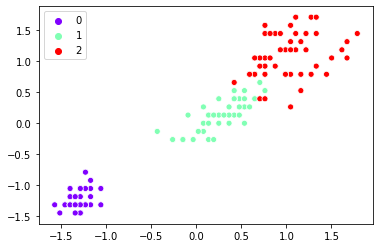

In [39]:
sns.scatterplot(x[:,2],x[:,3],hue=y,palette='rainbow')

In [48]:
from sklearn.cluster import KMeans

# Create k-mean object
cluster = KMeans(n_clusters=3, random_state=0, n_jobs=-1)

# Train model
model = cluster.fit(x[:,2][:,np.newaxis],x[:,3][:,np.newaxis])

In [108]:
# getting the predictions
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [82]:
def replace(y):
    for i in range(len(y)):
        if y[i] == 0:
            y[i] = 1
        elif y[i] == 1:
            y[i] = 2
        elif y[i] == 2:
            y[i] = 0
replace(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Text(0.5, 1.0, 'Original')

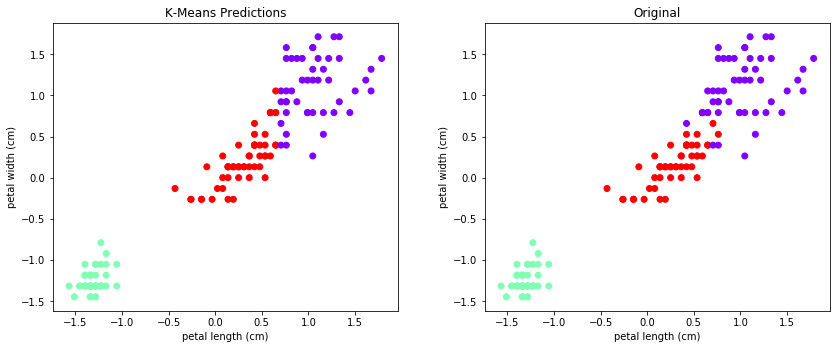

In [107]:
ax1 = plt.axes((0,0,0.8,1))
ax1.scatter(x[:,2],x[:,3],c=model.labels_, cmap = 'rainbow')
ax1.set_xlabel(load_iris()['feature_names'][2])
ax1.set_ylabel(load_iris()['feature_names'][3])
ax1.set_title("K-Means Predictions")

ax2 = plt.axes((1,0,0.8,1))
ax2.scatter(x[:,2],x[:,3],c=y, cmap = 'rainbow')
ax2.set_xlabel(load_iris()['feature_names'][2])
ax2.set_ylabel(load_iris()['feature_names'][3])
ax2.set_title("Original")